## **Unemployment Analysis With Python TASK 2**
## **DATA SCIENCE**

# **Name: Sanket Sanjay Bhosale**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

In [ ]:
data = pd.read_csv("/content/Unemployment in India.csv")
data = pd.read_csv("/content/Unemployment_Rate_upto_11_2020.csv")
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [ ]:
data.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [ ]:
data.columns = ["States","Date","Frequency","Estimated Unemployment Rate","Estimated Employed","Estimated Labour Participation Rate","Region","longitude","latitude"]

**Stats**


In [ ]:
df_stats = data[['Estimated Unemployment Rate',
       'Estimated Employed', 'Estimated Labour Participation Rate']]


round(df_stats.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Estimated Unemployment Rate,267.0,12.24,10.80,0.50,4.84,9.65,16.76,75.85
Estimated Employed,267.0,13962105.72,13366318.36,117542.00,2838930.50,9732417.00,21878686.00,59433759.00
Estimated Labour Participation Rate,267.0,41.68,7.85,16.77,37.26,40.39,44.06,69.69


In [ ]:
region_stats = data.groupby(['Region'])[['Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate']].mean().reset_index()

region_stats = round(region_stats,2)

region_stats

,Region,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate
0,East,13.92,19602366.90,40.11
1,North,15.89,13072487.92,38.70
2,Northeast,10.95,3617105.53,52.06
3,South,10.45,14040589.33,40.44
4,West,8.24,18623512.72,41.26


Correlation

<ipython-input-54-ae8142940e67>:1: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



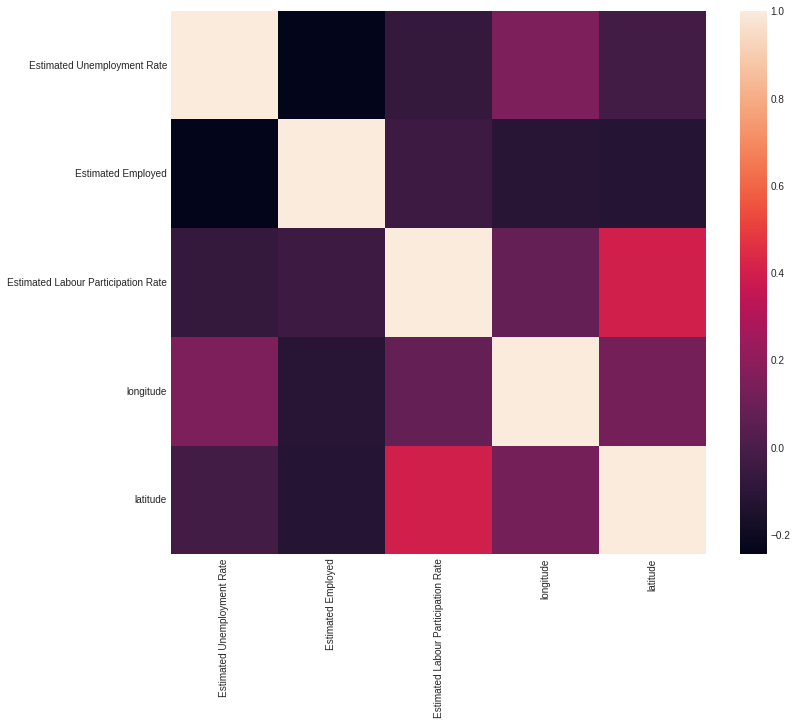

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12,10))
sns.heatmap(data.corr())
plt.show()

**Scatter Plot**

In [ ]:
fig = px.scatter_matrix(data,template='plotly',
    dimensions=['Estimated Unemployment Rate','Estimated Employed',
                'Estimated Labour Participation Rate'],
    color='Region')
fig.show()

Data Visualization

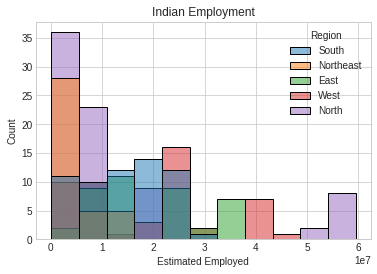

In [ ]:
data.columns = ["States","Date","Frequency","Estimated Unemployment Rate","Estimated Employed","Estimated Labour Participation Rate","Region","longitude","latitude"]
plt.title("Indian Employment")
sns.histplot(x='Estimated Employed',hue='Region',data=data)
plt.show()

<Axes: title={'center': 'Indian Unemployment'}, xlabel='Estimated Unemployment Rate', ylabel='Count'>

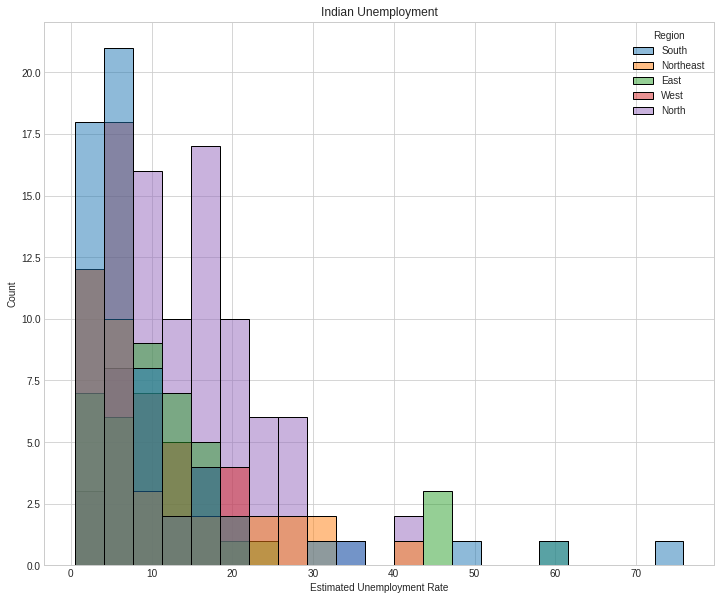

In [ ]:
plt.figure(figsize=(12,10))
plt.title('Indian Unemployment')
sns.histplot(x='Estimated Unemployment Rate',hue='Region',data=data)

In [ ]:
fig = px.box(data,x='States',y='Estimated Unemployment Rate',color='States',title='Unemployment rate',template='plotly')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [ ]:

plot_ump = data[['Estimated Unemployment Rate','States']]

data_unemp = plot_ump.groupby('States').mean().reset_index()

data_unemp = data_unemp.sort_values('Estimated Unemployment Rate')

fig = px.bar(data_unemp, x='States',y='Estimated Unemployment Rate',color='States',
            title='Average Unemployment Rate in each state',template='plotly')

fig.show()

In [ ]:
fig = px.scatter_geo(data,'longitude', 'latitude', color="Region",
                     hover_name="States", size="Estimated Unemployment Rate",
                     animation_frame="Date",scope='asia',template='plotly',title='Impack of lockdown on employement across regions')

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000

fig.update_geos(lataxis_range=[5,35], lonaxis_range=[65, 100],oceancolor="#6dd5ed",
    showocean=True)

fig.show()

In [ ]:
unemployment = data[["States","Region","Estimated Unemployment Rate"]]
figure = px.sunburst(unemployment,values="Estimated Unemployment Rate", 
                     path=["Region","States"],color_continuous_scale='RdY1Gn',
                     title = "Unemployment in India",width=700,height=700,)
figure.show()